# 5HT effects in feeding

> Fill in a module description here

In [ ]:
#| default_exp core

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| export
import svgutils
from svgutils.compose import *
import dabest
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')
import esploco.plotTools
from esploco.plotTools import setFont
setFont('inter', 6)
plt.style.use('seaborn-colorblind')
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'
from matplotlib import font_manager
import matplotlib
font_dirs = ["/Users/sangyuxu/Library/Fonts"]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

import pickle
import pandas as pd
import scipy
import numpy as np
import dabest
paperpath = '/Users/sangyuxu/Library/Mobile Documents/com~apple~CloudDocs/EspressoManu/'
picklepath = paperpath + 'DataforFigures/Behavior/Data/pickles/'
imagepath = paperpath + 'Figures20240202/'
figurepath = imagepath + '/Figure3/'
panelpath = figurepath + '/panels and data/'
with open(picklepath+ 'W1118Dark_e.pickle', 'rb') as f:
            W1118Dark_e = pickle.load(f)
with open(picklepath + 'W1118Dark_ele.pickle', 'rb') as f:
            W1118Dark_ele = pickle.load(f)
with open(picklepath + 'TrhCsCh_ele.pickle', 'rb') as f:
            TrhCsCh_ele = pickle.load(f)
with open(picklepath + 'TrhACR1_ele.pickle', 'rb') as f:
            TrhACR1_ele = pickle.load(f)    
with open(picklepath + 'R50CsCh_ele.pickle', 'rb') as f:
            R50CsCh_ele = pickle.load(f)
with open(picklepath + 'R50ACR1_ele.pickle', 'rb') as f:
            R50ACR1_ele = pickle.load(f) 


TrhCsCh = pd.read_csv(picklepath + 'TrhCsCh_ele.csv').sort_values(by = 'Light')
R50CsCh = pd.read_csv(picklepath + 'R50CsCh_ele.csv').sort_values(by = 'Light')
TrhACR = pd.read_csv(picklepath + 'TrhACRRound2_ele.csv').sort_values(by = 'Light')
R50ACR = pd.read_csv(picklepath + 'R50ACRRound2_ele.csv').sort_values(by = 'Light')
for df in [TrhCsCh, R50CsCh, TrhACR, R50ACR]:
    df['Volume'] = df['Volume']*1000
    df['Meal Size'] = df['Meal Size']*1000
    df['Feed Speed'] = df['Feed Speed']*1000
cm = W1118Dark_ele.cm

/var/folders/jq/z93pq6zd39s_vky_yyjtcxp00000gn/T/ipykernel_36387/1094665554.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')
/var/folders/jq/z93pq6zd39s_vky_yyjtcxp00000gn/T/ipykernel_36387/1094665554.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')
Fontconfig warning: ignoring UTF-8: not a valid region tag


In [ ]:
TrhCsCh['GenoReduced'] = TrhCsCh.Genotype.replace({'trh-gal4>uas-chrimson':'Trh>Chr', 'w1118; uas-chrimson':'Chr/w', 'w1118; trh-gal4':'Trh/w'}).astype('category').cat.set_categories(['Chr/w', 'Trh/w', 'Trh>Chr'], ordered=True)
R50CsCh['GenoReduced'] = R50CsCh.Genotype.replace({'r50h05-gal4>uas-chrimson':'R50H05>Chr', 'w1118;uas-cschrimson':'Chr/w', 'w1118; r50h05-gal4':'R50H05/w'}).astype('category').cat.set_categories(['Chr/w', 'R50H05/w', 'R50H05>Chr'], ordered=True)
TrhACR['GenoReduced'] = TrhACR.Genotype.replace({'trh-gal4>uas-acr1':'Trh>ACR1', 'w1118; uas-acr1':'ACR1/w', 'w1118; trh-gal4':'Trh/w'}).astype('category').cat.set_categories(['ACR1/w', 'Trh/w', 'Trh>ACR1'], ordered=True)
R50ACR['GenoReduced'] = R50ACR.Genotype.replace({'r50h05-gal4>uas-acr1':'R50H05>ACR1', 'w1118; uas-acr1':'ACR1/w', 'w1118; r50h05-gal4':'R50H05/w'}).astype('category').cat.set_categories(['ACR1/w', 'R50H05/w', 'R50H05>ACR1'], ordered=True)

trhcschpalette = {'Trh>Chr':'orangered', 'Chr/w':'gray', 'Trh/w':'k'}
r50cschpalette = {'R50H05>Chr':'orangered', 'Chr/w':'gray', 'R50H05/w':'k'}
trhacrpalette = {'Trh>ACR1':'seagreen', 'ACR1/w':'gray', 'Trh/w':'k'}
r50acrpalette = {'R50H05>ACR1':'seagreen', 'ACR1/w':'gray', 'R50H05/w':'k'}



In [ ]:
TrhCsCh.columns

Index(['Light', 'Genotype', 'Status', 'ID', 'Starvation', 'Meal Size',
       'Feed Speed', 'Prefeed Speed', 'Duringfeed Speed', 'Postfeed Speed',
       'Meal Duration', 'Volume', 'Count', 'Duration', 'Latency',
       'Duringfeed Speed Ratio', 'Perifeed Speed Ratio', 'Speed', 'Height',
       'Food Port Occupancy', 'Ctrl Port Occupancy', 'Falls', 'date',
       'GenoReduced'],
      dtype='object')

In [ ]:

cschpalette = {'Ctrl-Red Light On':'k', 'Ctrl-Red Light Off':'lightgray', 'Test-Red Light On':'orangered', 'Test-Red Light Off':'mistyrose' }
acrpalette = {'Ctrl-Green Light On':'k', 'Ctrl-Green Light Off':'lightgray', 'Test-Green Light On':'seagreen', 'Test-Green Light Off':'paleturquoise' }


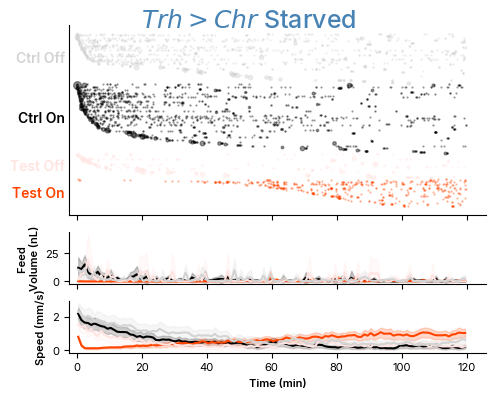

In [ ]:
setFont('inter', 9)
matplotlib.rcParams['pdf.fonttype'] = 42
plt.rcParams.update({'font.family':'inter'})
a, b, c = TrhCsCh_ele.plotStacked(colorBy = ['Status','Temperature'], customPalette=cschpalette, dotbase=1, dotratio=10, figsize=(5, 4),
                                  bubbleLegend = False, bubbleYLabelSize = 10)
a.suptitle('$Trh>Chr$ Starved', fontname = 'inter',fontsize = 18, weight = 'medium', color= 'steelblue')
a.savefig(panelpath+'TrhCsCh_raster.svg', format="svg")
a.savefig(panelpath+'TrhCsCh_raster.png', dpi = 300)

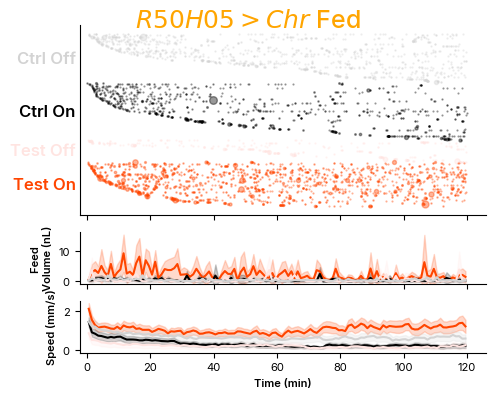

In [ ]:

setFont('inter', 9)

a, b, c = R50CsCh_ele.plotStacked(colorBy = ['Status','Temperature'], customPalette=cschpalette, dotbase=1, dotratio=10, figsize=(5, 4), bubbleLegend = False)
a.suptitle('$R50H05>Chr$ Fed',fontname = 'inter',fontsize = 18, weight = 'medium', color= 'orange')
a.savefig(panelpath+'R50CsCh_raster.svg')

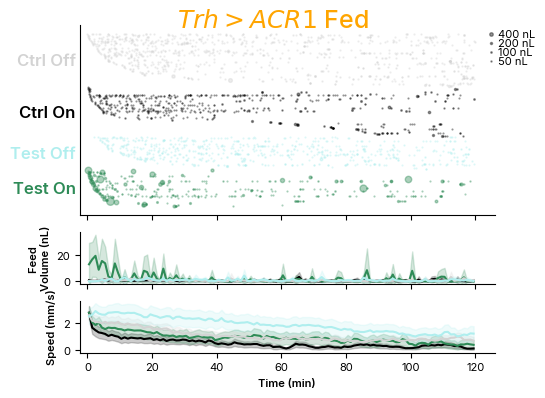

In [ ]:
setFont('inter', 9)
a, b, c = TrhACR1_ele.plotStacked(colorBy = ['Status','Temperature'], customPalette=acrpalette, dotbase=1, dotratio=10, figsize=(5.5, 4), bubbleLegend = True)
a.suptitle('$Trh>ACR1$ Fed', weight = 'medium',fontsize = 18,fontname = 'inter', color= 'orange')
a.savefig(panelpath+'TrhACR1_raster.svg')



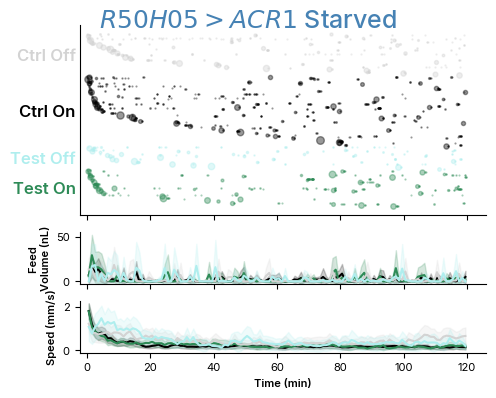

In [ ]:

setFont('inter', 9)
a, b, c = R50ACR1_ele.plotStacked(colorBy = ['Status','Temperature'], customPalette=acrpalette, dotbase=1, dotratio=10, figsize=(5, 4), bubbleLegend = False)
a.suptitle('$R50H05>ACR1$ Starved', weight = 'medium',fontsize = 18,fontname = 'inter', color= 'steelblue')
a.savefig(panelpath+'R50ACR1_raster.svg')


## 

/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/dabest/plot_tools.py:1944: UserWarning: 2.5% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/dabest/plot_tools.py:1944: UserWarning: 12.4% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/dabest/plot_tools.py:1944: UserWarning: 30.5% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)


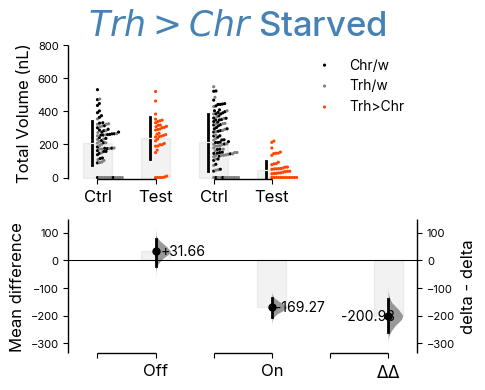

In [ ]:
data = TrhCsCh
metric = 'Volume'
subdata = data[['GenoReduced', 'Status', metric]].rename(columns = {'GenoReduced':'Genotype'}).reset_index()
subdata.to_csv(panelpath+'TrhCsCh_Vcontrast.csv')

trhCsChV = dabest.load(TrhCsCh, x = ['Status', 'GenoReduced'], y =  'Volume', delta2 = True, experiment = 'Light', x1_level=['Ctrl', 'Test'])
ftrhCsChV = trhCsChV.mean_diff.plot(contrast_bars_kwargs= {'alpha':.05},  swarm_bars_kwargs={'alpha':.05},raw_marker_size=.4, es_marker_size= 5, swarm_desat = 1,color_col='GenoReduced', custom_palette= trhcschpalette, fig_size=(4.5, 4), swarm_ylim= [-10, 800], swarm_label='Total Volume (nL)')
ftrhCsChV.axes[0].set_xticklabels(['Ctrl', 'Test', 'Ctrl', 'Test'])
order = [0,1,2]
handles = TrhCsCh.GenoReduced.unique().to_list()
ftrhCsChV.axes[0].legend([handles[2-i] for i in order], frameon=False,loc='best', fontsize= 10, markerscale = 1, )
leg = ftrhCsChV.axes[0].get_legend()
hl_dict = {handle.get_label(): handle for handle in leg.legendHandles}
hl_dict['_child0'].set_color(trhcschpalette['Trh/w'])
hl_dict['_child1'].set_color(trhcschpalette['Chr/w'])
hl_dict['_child2'].set_color(trhcschpalette['Trh>Chr'])
ftrhCsChV.suptitle('$Trh>Chr$ Starved', weight = 'medium', fontsize = 25, color = 'steelblue', y=.97)
ftrhCsChV.axes[1].set_xticklabels(['', 'Off', '', 'On','', r'$\Delta\Delta$'])
ftrhCsChV.savefig(panelpath+'TrhCsCh_Vcontrast.svg')

/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/dabest/plot_tools.py:1944: UserWarning: 40.0% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/dabest/plot_tools.py:1944: UserWarning: 30.0% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/dabest/plot_tools.py:1944: UserWarning: 38.6% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)


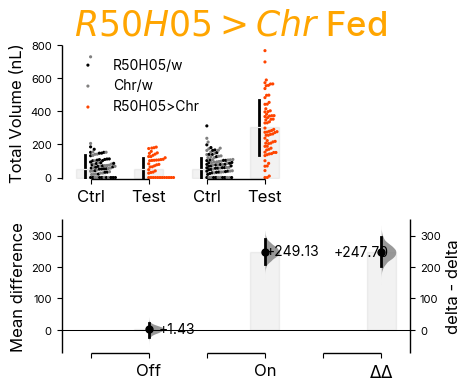

In [ ]:
data = R50CsCh
metric = 'Volume'
subdata = data[['GenoReduced', 'Status', metric]].rename(columns = {'GenoReduced':'Genotype'}).reset_index()
subdata.to_csv(panelpath+'R50CsCh_Vcontrast.csv')

r50CsChV = dabest.load(R50CsCh, x = ['Status', 'GenoReduced'], y =  'Volume', delta2 = True, experiment = 'Light', x1_level=['Ctrl', 'Test'])
fr50CsChV = r50CsChV.mean_diff.plot(contrast_bars_kwargs= {'alpha':.05},  swarm_bars_kwargs={'alpha':.05},raw_marker_size=0.4, es_marker_size= 5, swarm_desat = 1,custom_palette= r50cschpalette, fig_size=(4.5, 4), swarm_ylim= [-10, 800],  swarm_label='Total Volume (nL)')
fr50CsChV.axes[0].set_xticklabels(['Ctrl', 'Test', 'Ctrl', 'Test'])
order = [1, 2, 0]
handles = R50CsCh.GenoReduced.unique().to_list()
fr50CsChV.axes[0].legend([handles[2-i] for i in order], frameon=False,loc='best', fontsize= 10, markerscale = 1, )
leg = fr50CsChV.axes[0].get_legend()
hl_dict = {handle.get_label(): handle for handle in leg.legendHandles}
hl_dict['_child0'].set_color(r50cschpalette['R50H05/w'])
hl_dict['_child1'].set_color(r50cschpalette['Chr/w'])
hl_dict['_child2'].set_color(r50cschpalette['R50H05>Chr'])
fr50CsChV.suptitle('$R50H05>Chr$ Fed', weight = 'medium',fontsize = 25,color = 'orange',y=.97)

fr50CsChV.axes[1].set_xticklabels(['', 'Off', '', 'On','', r'$\Delta\Delta$'])
fr50CsChV.savefig(panelpath+'R50CsCh_Vcontrast.svg')

/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/dabest/plot_tools.py:1944: UserWarning: 23.5% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/dabest/plot_tools.py:1944: UserWarning: 7.7% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/dabest/plot_tools.py:1944: UserWarning: 35.0% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)


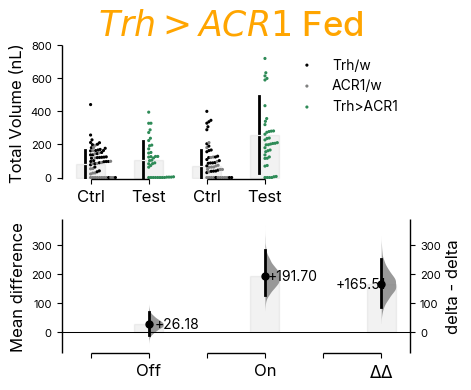

In [ ]:
data = TrhACR
metric = 'Volume'
subdata = data[['GenoReduced', 'Status', metric]].rename(columns = {'GenoReduced':'Genotype'}).reset_index()
subdata.to_csv(panelpath+'TrhACR1_Vcontrast.csv')


rtrhACRV = dabest.load(TrhACR, x = ['Status', 'GenoReduced'], y =  'Volume', delta2 = True, experiment = 'Light', x1_level=['Ctrl', 'Test'])
ftrhACRV = rtrhACRV.mean_diff.plot(contrast_bars_kwargs= {'alpha':.05},  swarm_bars_kwargs={'alpha':.05},raw_marker_size=0.4, es_marker_size= 5, swarm_desat = 1,custom_palette= trhacrpalette, fig_size=(4.5, 4),swarm_ylim= [-10, 800],  swarm_label='Total Volume (nL)')
ftrhACRV.axes[0].set_xticklabels(['Ctrl', 'Test', 'Ctrl', 'Test'])
order = [2, 0, 1]
handles = TrhACR.GenoReduced.unique().to_list()
ftrhACRV.axes[0].legend([handles[2-i] for i in order], frameon=False,loc='best', fontsize= 10, markerscale = 1, )
leg = ftrhACRV.axes[0].get_legend()
hl_dict = {handle.get_label(): handle for handle in leg.legendHandles}
hl_dict['_child0'].set_color('k')
hl_dict['_child1'].set_color(trhacrpalette['ACR1/w'])
hl_dict['_child2'].set_color(trhacrpalette['Trh>ACR1'])

ftrhACRV.suptitle('$Trh>ACR1$ Fed', weight = 'medium',fontsize = 25, color= 'orange', y=.97)
ftrhACRV.axes[1].set_xticklabels(['', 'Off', '', 'On','', r'$\Delta\Delta$'])
ftrhACRV.savefig(panelpath+'TrhACR1_Vcontrast.svg')




/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/dabest/plot_tools.py:1944: UserWarning: 13.0% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)


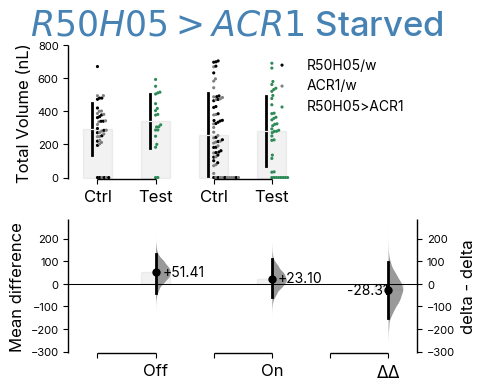

In [ ]:
data = R50ACR
metric = 'Volume'
subdata = data[['GenoReduced', 'Status', metric]].rename(columns = {'GenoReduced':'Genotype'}).reset_index()
subdata.to_csv(panelpath+'R50ACR1_Vcontrast.csv')

r50ACRV = dabest.load(R50ACR, x = ['Status', 'GenoReduced'], y =  'Volume', delta2 = True, experiment = 'Light', x1_level=['Ctrl', 'Test'])
fr50ACRV = r50ACRV.mean_diff.plot(contrast_bars_kwargs= {'alpha':.05},  swarm_bars_kwargs={'alpha':.05},raw_marker_size=0.4, es_marker_size= 5, swarm_desat = 1, custom_palette= r50acrpalette, fig_size=(4.5, 4),swarm_ylim= [-10, 800],  swarm_label='Total Volume (nL)')
fr50ACRV.axes[0].set_xticklabels(['Ctrl', 'Test', 'Ctrl', 'Test'])
order = [1,2,0]
handles = R50ACR.GenoReduced.unique().to_list()
fr50ACRV.axes[0].legend([handles[2-i] for i in order], frameon=False,loc='best', fontsize= 10, markerscale = 1, )
leg = fr50ACRV.axes[0].get_legend()
hl_dict = {handle.get_label(): handle for handle in leg.legendHandles}
hl_dict['_child0'].set_color(r50acrpalette['R50H05/w'])
hl_dict['_child1'].set_color(r50acrpalette['ACR1/w'])
hl_dict['_child2'].set_color(r50acrpalette['R50H05>ACR1'])
fr50ACRV.suptitle('$R50H05>ACR1$ Starved', weight = 'medium',fontsize = 25, color= 'steelblue', y=.97)

fr50ACRV.axes[1].set_xticklabels(['', 'Off', '', 'On','', r'$\Delta\Delta$'])
fr50ACRV.savefig(panelpath+'R50ACR1_Vcontrast.svg')

metric             Volume
y                  Volume
swarmLabel    Volume (nL)
yUnit                  nL
Name: 0, dtype: object
metric        Count
y             Count
swarmLabel    Count
yUnit              
Name: 1, dtype: object
metric            Meal Size
y                 Meal Size
swarmLabel    MealSize (nL)
yUnit                    nL
Name: 2, dtype: object
metric              Duration
y                   Duration
swarmLabel    Duration (min)
yUnit                    min
Name: 3, dtype: object
metric              Latency
y                   Latency
swarmLabel    Latency (min)
yUnit                   min
Name: 4, dtype: object
metric               Speed
y                    Speed
swarmLabel    Speed (mm/s)
yUnit                 mm/s
Name: 5, dtype: object
metric        Perifeed Speed Ratio
y             Perifeed Speed Ratio
swarmLabel    Perifeed Speed Ratio
yUnit                             
Name: 6, dtype: object
metric             Height
y                  Height
swarmLabel    H

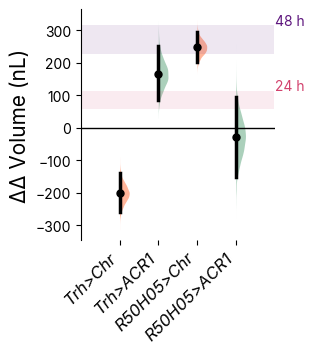

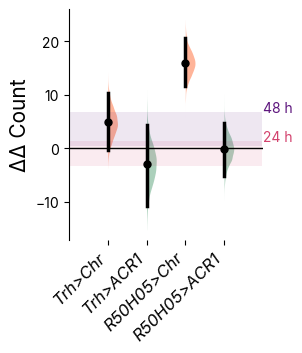

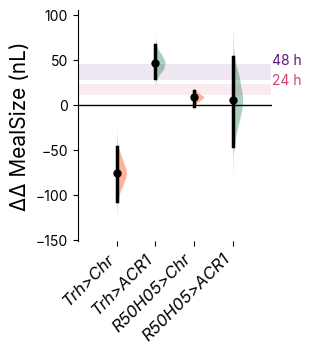

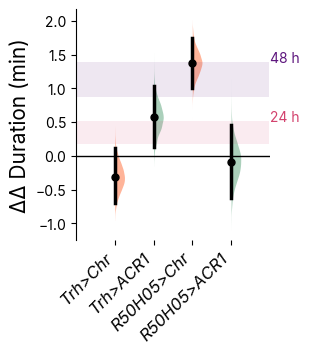

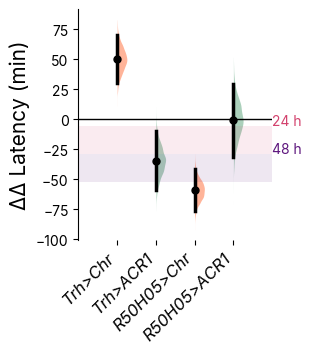

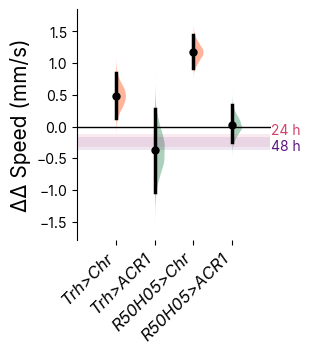

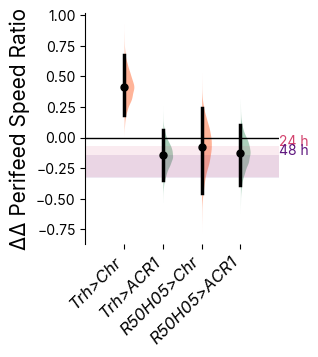

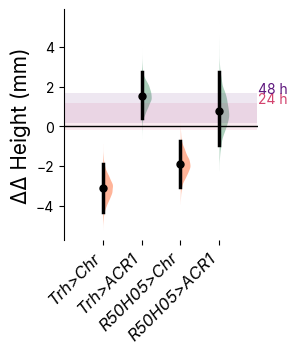

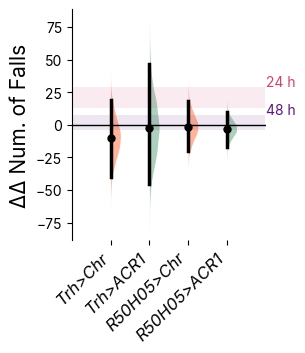

In [ ]:

palettes = [trhcschpalette, trhacrpalette, r50cschpalette, r50acrpalette]
wtBaseline = pd.read_csv('/Users/sangyuxu/Library/Mobile Documents/com~apple~CloudDocs/EspressoManu/Figures20240202/Figure1/wtBaseline.csv')
def plotForestDD(contrasts, metric, palettes = palettes, exptNames = None, labelX = True, imagepath = None):
    def pickouttestcolor(palette):
        s = [i for i in palette.keys() if 'w1118' not in i]    
        return palette[s[0]]
    if palettes:
        testColors = [pickouttestcolor(p) for p in palettes]
    DDbootstraps = [c.mean_diff.delta_delta.bootstraps_delta_delta for c in contrasts]
    setFont('inter', 10)
    fForest = plt.figure(figsize = [2.5, 3])
    ax = plt.subplot(111)
    default_violinplot_kwargs = {'widths':0.5, 'vert':True,
                                   'showextrema':False, 'showmedians':False}
    v = ax.violinplot(DDbootstraps, **default_violinplot_kwargs)
    dabest.plot_tools.halfviolin(v, alpha = 0.4)
    ax.plot([0, len(contrasts)+1], [0, 0], 'k', linewidth = 1)
    ticks = list(range(1, len(contrasts)+1))
    for i in ticks:
        ax.plot(i, contrasts[i-1].mean_diff.delta_delta.difference, 'k.', markersize = 10)
        ax.plot([i, i], [contrasts[i-1].mean_diff.delta_delta.bca_low, contrasts[i-1].mean_diff.delta_delta.bca_high], 'k', linewidth = 2.5)

    ax.set_xticks(ticks)
    ax.set_xlim([0, len(contrasts)+1])
#     ax.set_xticklabels(mainDataPathList[1::],
#                       rotation = 45, ha = 'right', fontsize = 20)
    ax.set_ylabel('ΔΔ ' + metric.swarmLabel, fontsize = 15)
#     ax.set_title(metric.metric, fontsize = 20)
    # ax.set_ylim(-0.5, 0.2)
    ax.spines['bottom'].set_color(None)
    ax.spines['top'].set_color(None)
    ax.spines['right'].set_color(None)
    # ax.spines['left'].set_color(None)

    for i in range(0, len(contrasts)):
        if palettes:
                ax.collections[i].set_fc(testColors[i])
        else:
            if contrasts[i].mean_diff.delta_delta.bca_low>0:
                ax.collections[i].set_fc('g')
            if contrasts[i].mean_diff.delta_delta.bca_high<0:
                ax.collections[i].set_fc('r')
    # ax.set_xticks(list(range(i+1)))
    if exptNames:
        if labelX:
            ax.set_xticklabels(exptNames, 
                               rotation = 45, 
                               ha = 'right',
                               fontsize = 12)
        else:
            ax.set_xticklabels(['']* (i+1))
    
    return fForest

exptNames = ['Starved      \nDriver      \nResponder', '24 Hr\nTrh\nCsChR', '0 Hr\nTrh\nGtACR1', '0 Hr\nR50H05\nCsChR', '24 Hr\nR50H05\nGtACR1']
feedMetricMap = {'metric': ['Volume', 'Count', 'Meal Size', 'Duration', 'Latency', 'Speed', 'Perifeed Speed Ratio', 'Height', 'Falls'], 
             'y' : ['Volume', 'Count', 'Meal Size', 'Duration', 'Latency', 'Speed', 'Perifeed Speed Ratio', 'Height', 'Falls'], 
             'swarmLabel': ['Volume (nL)', 'Count', 'MealSize (nL)', 'Duration (min)', 'Latency (min)', 'Speed (mm/s)', 'Perifeed Speed Ratio', 'Height (mm)', 'Num. of Falls'],
                'yUnit': ['nL', '', 'nL', 'min', 'min', 'mm/s',  '', 'mm', '']}
feedMetricMapDf = pd.DataFrame(data = feedMetricMap)


for i in range(0, 9):
    
    entry = feedMetricMapDf.loc[i]
    print(entry)
#     setFont('Inter',9)
    cTrhCsCh = dabest.load(TrhCsCh, x = ['Status', 'GenoReduced'], experiment = 'Light', y = entry.metric, x1_level=['Ctrl', 'Test'], delta2 = True)
    cTrhACR  = dabest.load(TrhACR, x = ['Status', 'GenoReduced'], experiment = 'Light', y = entry.metric, x1_level=['Ctrl', 'Test'], delta2 = True)
    cR50CsCh = dabest.load(R50CsCh, x = ['Status', 'GenoReduced'], experiment = 'Light', y = entry.metric, x1_level=['Ctrl', 'Test'], delta2 = True)
    cR50ACR  = dabest.load(R50ACR, x = ['Status', 'GenoReduced'],  experiment = 'Light', y = entry.metric, x1_level=['Ctrl', 'Test'], delta2 = True)
    if i ==4:
        labelX = True
    else:
        labelX = True
    contrasts = [cTrhCsCh, cTrhACR, cR50CsCh, cR50ACR]
    Forest = plotForestDD(contrasts, entry, exptNames = ['Trh>Chr', 'Trh>ACR1', 'R50H05>Chr', 'R50H05>ACR1'], labelX = labelX)
    wtB = wtBaseline.loc[wtBaseline.Metric == entry.metric]
    x = np.arange(0.0, 5, 0.01)
    l24 = wtB.L24
    h24 = wtB.H24
    l48 = wtB.L48
    h48 = wtB.H48
    Forest.axes[0].fill_between(x, l24, h24, alpha=0.1, facecolor = sns.color_palette("magma")[3],zorder=1)
    Forest.axes[0].fill_between(x, l48, h48, alpha=0.1, facecolor = sns.color_palette("magma")[1],zorder=1)
    Forest.axes[0].text(5, h24, '24 h', color = sns.color_palette("magma")[3])
    if entry.metric == 'Speed':
        Forest.axes[0].text(5, l48, '48 h', color = sns.color_palette("magma")[1])
    else:
        Forest.axes[0].text(5, h48, '48 h', color = sns.color_palette("magma")[1])
    xtl = Forest.axes[0].get_xticklabels()    
    for x in xtl:
        x.set_style('italic')   
    Forest.savefig(panelpath+entry.metric + '.svg')




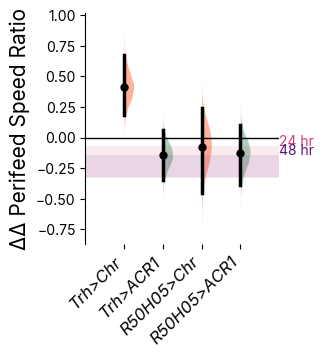

In [ ]:

Forest

In [ ]:
from svgutils.compose import *

Figure("16cm", "17cm", 
    Panel(SVG(panelpath + 'trhr50_normal.svg').scale(0.0085),
    Text("a", -0.2, 0, size=0.3, font = 'Inter', weight='bold'), 
    # Text("Trh>Chr", 0.2, .2, size=0.2, font = 'Inter', weight='italic', color = 'white'), 
    Text("b", -0.2, 2.4, size=0.3, font = 'Inter', weight='bold'), 
    # Text("R50H05>Chr", 0.2, 2.4, size=0.2, font = 'Inter', weight='italic', color = 'white') 
         ).move(1, .4),
    # Panel(SVG(figurepath + 'trhcsch_inverted.svg').scale(0.004),
    # Text("b", 0, 0, size=0.3, font = 'inter', weight='bold') ).move(1, 3),
    Panel(SVG(panelpath + 'starvationprotocol.svg').scale(0.009),
    Text("c", -0.2, -.2, size=0.3, font = 'inter', weight='bold') ).move(1, 5.7),
    Panel(SVG(panelpath + 'TrhCsCh_Raster.svg').scale(0.015),
    Text("d", 0.2, 0.1, size=0.3, font = 'inter', weight='bold') ).move(5, .4),
    Panel(SVG(panelpath + 'TrhACR1_raster.svg').scale(0.015),
    Text("e", 0.2, 0.1, size=0.3, font = 'inter', weight='bold') ).move(9.5, .4),
    Panel(SVG(panelpath + 'R50CsCh_raster.svg').scale(0.015),
    Text("f", 0.2, 0.1, size=0.3, font = 'inter', weight='bold') ).move(5, 5),
    Panel(SVG(panelpath + 'R50ACR1_raster.svg').scale(0.015),
    Text("g", 0.2, 0.1, size=0.3, font = 'inter', weight='bold') ).move(9.5, 5),
       
    Panel(SVG(panelpath + 'TrhCsCh_Vcontrast.svg').scale(0.01),
    Text("h", -0.2, 0.2, size=0.3, font = 'inter', weight='bold') ).move(1, 9.5),
    Panel(SVG(panelpath + 'TrhACR1_Vcontrast.svg').scale(0.01),
    Text("i", -0.2, 0.2, size=0.3, font = 'inter', weight='bold') ).move(4.5, 9.5),
    Panel(SVG(panelpath + 'R50CsCh_Vcontrast.svg').scale(0.01),
    Text("j",-0.2, 0.2, size=0.3, font = 'inter', weight='bold') ).move(8, 9.5),
    Panel(SVG(panelpath + 'R50ACR1_Vcontrast.svg').scale(0.01),
    Text("k", -0.2, 0.2, size=0.3, font = 'inter', weight='bold') ).move(11.5, 9.5),
       
    Panel(SVG(panelpath + 'Volume.svg').scale(0.015),
    Text("l", -0.1, 0.2, size=0.3, font = 'inter', weight='bold') ).move(1, 12.5),
    Panel(SVG(panelpath + 'Duration.svg').scale(0.015),
    Text("m", -0.1, 0.2, size=0.3, font = 'inter', weight='bold') ).move(4.5, 12.5),
    Panel(SVG(panelpath + 'Meal Size.svg').scale(0.015),
    Text("n", -0.1, 0.2, size=0.3, font = 'inter', weight='bold') ).move(8, 12.5),
    Panel(SVG(panelpath + 'Count.svg').scale(0.015),
    Text("o", -0.1, 0.2, size=0.3, font = 'inter', weight='bold') ).move(11.5, 12.5),
    ).save(figurepath+"/Figure3.svg")



# 

In [ ]:


def plotcontrast(data, metric, subdatafilename, palette, title, swarm_label ='Total Volume (nL)',  swarm_ylim= [-10, 900]):
    subdata = data[['GenoReduced', 'Status','Light', metric]].rename(columns = {'GenoReduced':'Genotype'}).reset_index()
    c = dabest.load(subdata, x = ['Status', 'Genotype'], y =  metric, delta2 = True, experiment = 'Light', x1_level=['Ctrl', 'Test'])
    f = c.mean_diff.plot(contrast_bars_kwargs= {'alpha':.05},  swarm_bars_kwargs={'alpha':.05},
                         raw_marker_size=.4, es_marker_size= 5, swarm_desat = 1,color_col='Genotype', 
                         custom_palette= palette, fig_size=(4.5, 4), swarm_ylim= swarm_ylim, swarm_label=swarm_label)
    f.axes[0].set_xticklabels(['Ctrl', 'Test', 'Ctrl', 'Test'])
    
    f.axes[0].legend(frameon=False,loc='right', fontsize= 9, markerscale =.5, )
    # leg = f.axes[0].get_legend()
    # hl_dict = {handle.get_label(): handle for handle in leg.legendHandles}
    # hl_dict['_child0'].set_color(palette[subdata['Genotype'].unique()[order[0]]])
    # hl_dict['_child1'].set_color(palette[subdata['Genotype'].unique()[order[1]]])
    # hl_dict['_child2'].set_color(palette[subdata['Genotype'].unique()[order[2]]])
    
    if 'Starved' in title:
        bgc = 'steelblue'
    else:
        bgc = 'orange'
    f.suptitle(title, weight = 'medium', fontsize = 25,color= bgc, y=.97)
    f.axes[1].set_xticklabels(['', 'Off', '', 'On','', r'$\Delta\Delta$'])
    f.axes[1].set_ylabel(r'$\Delta$ Volume (nL)')
    f.savefig(panelpath+  subdatafilename + '.svg')
    subdata.to_csv(panelpath+  subdatafilename + '.csv')
    return f


/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/dabest/plot_tools.py:1944: UserWarning: 2.1% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)


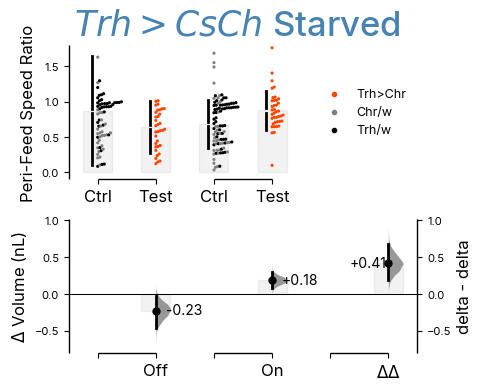

In [ ]:
fTrhCsCh_PFSRcontrast = plotcontrast(TrhCsCh, 'Perifeed Speed Ratio', 'TrhCsCh_PFSRcontrast', palette = trhcschpalette, title= '$Trh>CsCh$ Starved', swarm_label = 'Peri-Feed Speed Ratio', swarm_ylim = [-.1, 1.8])



/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/dabest/plot_tools.py:1944: UserWarning: 1.3% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)


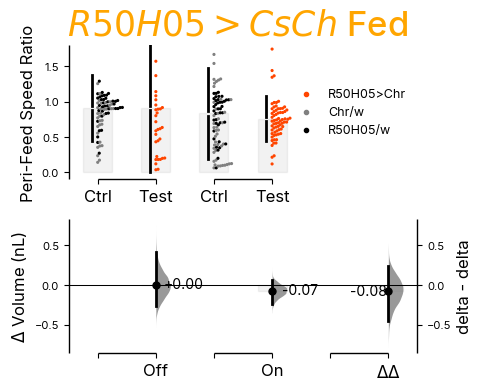

In [ ]:
fR50CsCh_PFSRcontrast = plotcontrast(R50CsCh, 'Perifeed Speed Ratio', 'R50CsCh_PFSRcontrast', palette = r50cschpalette, title= '$R50H05>CsCh$ Fed',swarm_label = 'Peri-Feed Speed Ratio', swarm_ylim = [-.1, 1.8])



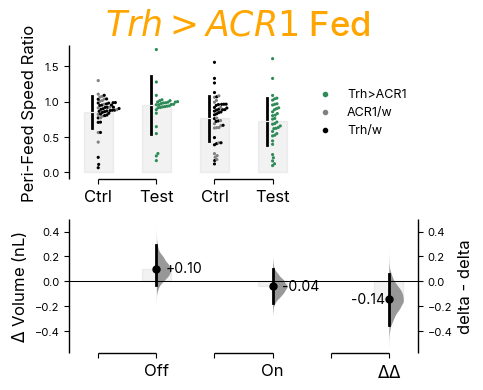

In [ ]:
fTrhACR_PFSRcontrast = plotcontrast(TrhACR, 'Perifeed Speed Ratio', 'TrhACR1_PFSRcontrast', palette = trhacrpalette, title= '$Trh>ACR1$ Fed',swarm_label = 'Peri-Feed Speed Ratio', swarm_ylim = [-.1, 1.8])


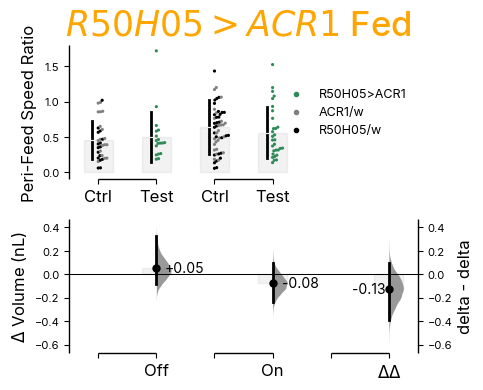

In [ ]:
fTR50H05ACR_PFSRcontrast = plotcontrast(R50ACR, 'Perifeed Speed Ratio', 'R50H05ACR1_PFSRcontrast', palette = r50acrpalette, title= '$R50H05>ACR1$ Fed',swarm_label = 'Peri-Feed Speed Ratio', swarm_ylim = [-.1, 1.8])


/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwa

<Figure size 500x4880 with 0 Axes>

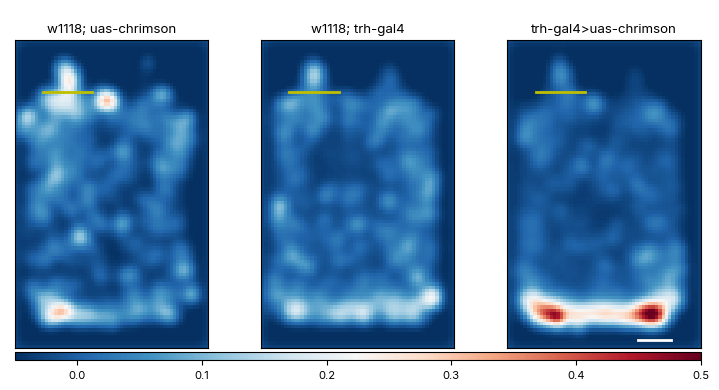

In [ ]:
setFont('inter', 16)

TrhCsCh_ele.plotMeanHeatMaps(binSize = 0.2,smooth = 2, col = 'Genotype', heatmapCMap = 'RdBu_r', plotZScore=True, vmin = -0.05, vmax = .5)
TrhCsCh_ele.meanHeatmapFig.set_size_inches(3.4, 2)
TrhCsCh_ele.meanHeatmapFig.suptitle('Trh>Chr')

TrhCsCh_ele.meanHeatmapFig.axes[0].set_title('$Chr/w$', fontsize='10', fontweight = 'medium')
TrhCsCh_ele.meanHeatmapFig.axes[1].set_title('$Trh/w$', fontsize='10', fontweight = 'medium')
TrhCsCh_ele.meanHeatmapFig.axes[2].set_title('$Trh>Chr$', fontsize='10', fontweight = 'medium')
TrhCsCh_ele.meanHeatmapFig.savefig(panelpath+'heatmap_trhcsch.png', bbox_inches='tight', dpi = 300)
TrhCsCh_ele.meanHeatmapFig.savefig(panelpath+'heatmap_trhcsch.svg', bbox_inches='tight')



/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwa

<Figure size 500x3920 with 0 Axes>

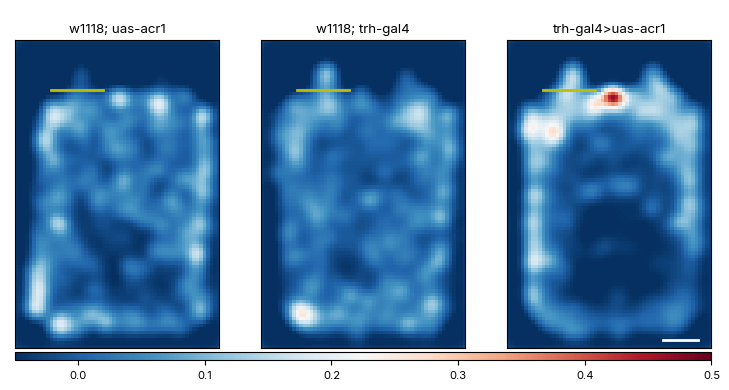

In [ ]:
setFont('inter', 16)

TrhACR1_ele.plotMeanHeatMaps(binSize = 0.2,smooth = 2, col = 'Genotype', heatmapCMap = 'RdBu_r', plotZScore=True, vmin = -0.05, vmax = .5)
TrhACR1_ele.meanHeatmapFig.set_size_inches(3.4, 2)
TrhACR1_ele.meanHeatmapFig.suptitle('Trh>ACR1')

TrhACR1_ele.meanHeatmapFig.axes[0].set_title('$ACR1/w$', fontsize='10', fontweight = 'medium')
TrhACR1_ele.meanHeatmapFig.axes[1].set_title('$Trh/w$', fontsize='10', fontweight = 'medium')
TrhACR1_ele.meanHeatmapFig.axes[2].set_title('$Trh>ACR1$', fontsize='10', fontweight = 'medium')
TrhACR1_ele.meanHeatmapFig.savefig(panelpath+'heatmap_trhAcr.png', bbox_inches='tight', dpi = 300)
TrhACR1_ele.meanHeatmapFig.savefig(panelpath+'heatmap_trhAcr.svg', bbox_inches='tight')



/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwa

<Figure size 500x6320 with 0 Axes>

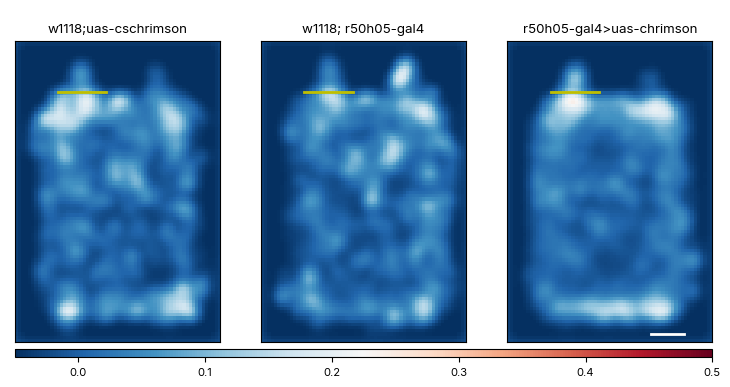

In [ ]:

setFont('inter', 16)

R50CsCh_ele.plotMeanHeatMaps(binSize = 0.2,smooth = 2, col = 'Genotype', heatmapCMap = 'RdBu_r', plotZScore=True, vmin = -0.05, vmax = .5)
R50CsCh_ele.meanHeatmapFig.set_size_inches(3.4, 2)
R50CsCh_ele.meanHeatmapFig.suptitle('R50H05>Chr')

R50CsCh_ele.meanHeatmapFig.axes[0].set_title('$Chr/w$', fontsize='10', fontweight = 'medium')
R50CsCh_ele.meanHeatmapFig.axes[1].set_title('$R50H05/w$', fontsize='10', fontweight = 'medium')
R50CsCh_ele.meanHeatmapFig.axes[2].set_title('$R50H05>Chr$', fontsize='10', fontweight = 'medium')
R50CsCh_ele.meanHeatmapFig.savefig(panelpath+'heatmap_R50H05csch.png', bbox_inches='tight', dpi = 300)
R50CsCh_ele.meanHeatmapFig.savefig(panelpath+'heatmap_R50H05csch.svg', bbox_inches='tight')



/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwa

<Figure size 500x2880 with 0 Axes>

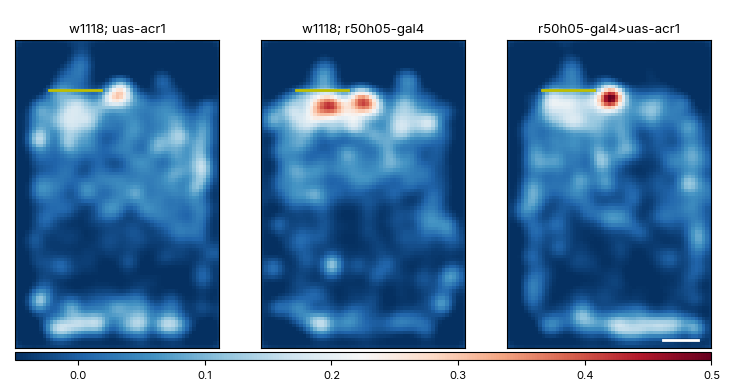

In [ ]:
R50ACR1_ele

setFont('inter', 16)

R50ACR1_ele.plotMeanHeatMaps(binSize = 0.2,smooth = 2, col = 'Genotype', heatmapCMap = 'RdBu_r', plotZScore=True, vmin = -0.05, vmax = .5)
R50ACR1_ele.meanHeatmapFig.set_size_inches(3.4, 2)
R50ACR1_ele.meanHeatmapFig.suptitle('R50H05>ACR1')
R50ACR1_ele.meanHeatmapFig.axes[0].set_title('$ACR1/w$', fontsize='10', fontweight = 'medium')
R50ACR1_ele.meanHeatmapFig.axes[1].set_title('$R50H05/w$', fontsize='10', fontweight = 'medium')
R50ACR1_ele.meanHeatmapFig.axes[2].set_title('$R50H05>ACR1$', fontsize='10', fontweight = 'medium')
R50ACR1_ele.meanHeatmapFig.savefig(panelpath+'heatmap_R50H05acr.png', bbox_inches='tight', dpi = 300)
R50ACR1_ele.meanHeatmapFig.savefig(panelpath+'heatmap_R50H05acr.svg', bbox_inches='tight')



## Figure 4

In [ ]:
from svgutils.compose import *

Figure("16cm", "14cm", 
    Panel(SVG(panelpath + 'heatmap_trhcsch.svg').scale(0.03),
    Text("a", 0, 0.2, size=0.3, font = 'inter', weight='bold') ).move(1, 0.5),
    Panel(SVG(panelpath + 'heatmap_trhAcr.svg').scale(0.03),
    Text("b", 0, 0.2, size=0.3, font = 'inter', weight='bold') ).move(8, 0.5),
    Panel(SVG(panelpath + 'heatmap_R50H05csch.svg').scale(0.03),
    Text("c", 0, 0.2, size=0.3, font = 'inter', weight='bold') ).move(1, 4.3),
    Panel(SVG(panelpath + 'heatmap_R50H05acr.svg').scale(0.03),
    Text("d", 0, 0.2, size=0.3, font = 'inter', weight='bold') ).move(8, 4.3),
    Panel(SVG(panelpath + 'Height.svg').scale(0.015),
    Text("e", 0, 0.2, size=0.3, font = 'inter', weight='bold') ).move(1, 9),
    Panel(SVG(panelpath + 'Latency.svg').scale(0.015),
    Text("f",0, 0.2, size=0.3, font = 'inter', weight='bold') ).move(4.5, 9),
    Panel(SVG(panelpath + 'Speed.svg').scale(0.015),
    Text("g",0, 0.2, size=0.3, font = 'inter', weight='bold') ).move(8, 9),
    Panel(SVG(panelpath + 'Perifeed Speed Ratio.svg').scale(0.015),
    Text("h",0, 0.2, size=0.3, font = 'inter', weight='bold') ).move(11.5, 9),
        ).save(figurepath+"/Figure4.svg")


# 